# ЛАБОРАТОРНАЯ РАБОТА 2

## Проверка статистических гипотез. Гипотезы однородности

### Цель работы: 
Проверка статистических гипотез о однородности выборочных совокупностей в пакете STATISTICA, используя критерии: Хи-квадрат, t-критерий Стьюдента, непараметрический критерий Манна-Уитни.

### Задание 1

1.	Дана выборка ответов на вопросы социологического анкетирования 400 пенсионеров Томской области, представленная в виде числовых кодов ответов, соответствующих номеру ответа (файл “Данные”, лист “Ответы”). В соответствии с вариантом задания (см. ниже), исследовать выборочное множество ответов на указанный вопрос анкеты (файл “Анкета”) на однородность по признаку, указанному в варианте задания, по критерию Хи-квадрат. Провести попарное сравнение на однородность тех же данных по критерию Манна-Уитни. 

### вариант 2

In [2]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import scipy.stats as stats
import statsmodels.api as sm
from pylab import plt, mpl
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [8]:
df_task1 = pd.DataFrame({'№_вопроса' : ['в13'],
                        'признак': ['в68']})
df_task1

,№_вопроса,признак
0,в13,в68


### 13. Как Вы оцениваете Ваше здоровье в сравнении со здоровьем Ваших сверстников? (выберите один вариант)
1.	Очень хорошее
2.	Хорошее
3.	Среднее (не хорошее, но и не плохое)
4.	Плохое
5.	Очень плохое
6.	Затрудняюсь ответить


### 68. Какое у Вас образование?
1. Неполное среднее
2. Среднее (школа)
3. Среднее специальное (техникум)
4. Незаконченное высшее
5. Высшее
6. Имею ученую степень



## Загрузка данных

In [4]:
data = pd.read_excel('LAB_DATA.xlsx', sheet_name=0)
data

,в1,в2_1,в2_2,в2_3,в2_4,в2_5,в2_6,в2_7,в2_8,в2_9,...,в71да_5,в71да_6,в71да_др,в72,в74,в75,в76,в78,в78_1,нас.пункт
0,1,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,2,4,4,1,1,Томск
1,3,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,2,4,4,1,1,Томск
2,1,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,2,3,1,1,1,Томск
3,3,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,1.0,нет жилья,1.0,3,4,1,1,1,Томск
4,3,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,2,3,1,1,1,Томск
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,3,4,1,3,8,Тегульдетский район
396,3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2,4,1,3,8,Тегульдетский район
397,2,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,2,4,4,3,8,Тегульдетский район
398,2,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,3,4,1,3,8,Тегульдетский район


### Создаем таблицу сопряжения 

In [10]:
df_cross = pd.crosstab(data[df_task1.loc[0][0]], data[df_task1.loc[0][1]]).reset_index()
df_cross = df_cross.rename(columns = {1: 'Неполное среднее',
                                      2: 'Среднее',
                                      3: 'Среднее-специальное',
                                      4: 'Незаконченное высшее',
                                      5: 'Высшее',
                                      6: 'Ученая степень'})
df_cross

в68,в13,Неполное среднее,Среднее,Среднее-специальное,Незаконченное высшее,Высшее,Ученая степень
0,1,2,1,1,0,0,0
1,2,3,14,16,2,23,0
2,3,15,42,101,2,73,2
3,4,12,20,34,0,14,0
4,5,4,5,6,0,2,1
5,6,0,1,3,0,1,0


In [42]:
# Создаем фильтрованную таблицу сопряженности
df_cross_filter = df_cross[['Неполное среднее', 
                            'Среднее', 
                            'Среднее-специальное',
                            'Незаконченное высшее', 
                            'Высшее', 
                            'Ученая степень']]
df_cross_filter

в68,Неполное среднее,Среднее,Среднее-специальное,Незаконченное высшее,Высшее,Ученая степень
0,2,1,1,0,0,0
1,3,14,16,2,23,0
2,15,42,101,2,73,2
3,12,20,34,0,14,0
4,4,5,6,0,2,1
5,0,1,3,0,1,0


### Статистические показатели 

In [44]:
# Определим статистические показатели
df_stat = pd.DataFrame({df_task1.loc[0][0] : data[df_task1.loc[0][0]].describe(),
                       df_task1.loc[0][1] : data[df_task1.loc[0][1]].describe()})
df_stat

,в13,в68
count,400.000000,400.000000
mean,3.162500,3.210000
std,0.807914,1.317284
min,1.000000,1.000000
25%,3.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,5.000000
max,6.000000,6.000000


### Тест хи квадрат

In [43]:
chi2_stat = stats.chi2_contingency(df_cross[['Неполное среднее', 'Среднее', 'Среднее-специальное','Незаконченное высшее', 'Высшее', 'Ученая степень']])
print(f'Статистика Chi-square = {chi2_stat[0]}')
print(f'p_value = {chi2_stat[1]}')

Статистика Chi-square = 44.54518447803458
p_value = 0.009417660367272923


### Вывод 
Наблюдаемый уровень значимости   говорит о статистически значимом различии выборочных распределений. Таким образом, нулевая гипотеза отвергается, и мы признаем, что удовлетворенность своим здоро-вьем  между уровнем образования отличается

### Гистограмма распределений 

Text(0.5, 1.0, 'Распределение ответов по образованию')

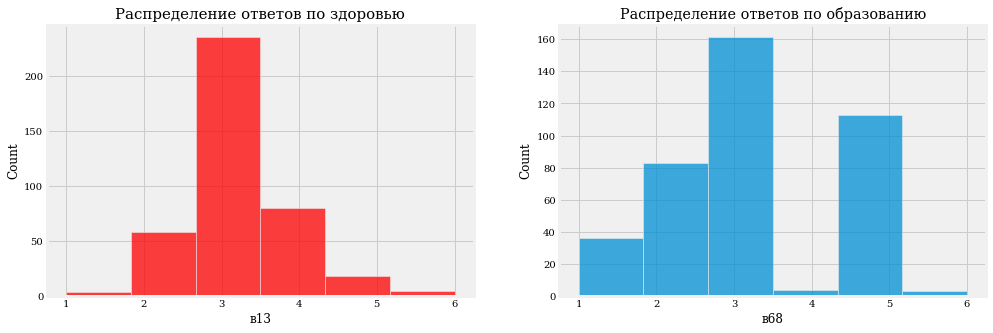

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.histplot(data[df_task1.loc[0][0]], ax=ax[0], color='red', bins=6)
ax[0].set_title('Распределение ответов по здоровью', size=15)


sns.histplot(data[df_task1.loc[0][1]], ax=ax[1], bins=6)
ax[1].set_title('Распределение ответов по образованию')



### Тест на определение соответствия нормальному распределению 
### Тест Шапиро-Уилка

In [24]:
stats_shapiro1 = stats.shapiro(data[df_task1.loc[0][0]])
stats_shapiro2 = stats.shapiro(data[df_task1.loc[0][1]])

p_value1 = stats_shapiro1[1]
p_value2 = stats_shapiro2[1]

print(f'Значение p_value для вопроса {df_task1.loc[0][0]} составляет: p_value1 = {p_value1}')
print(f'Значение p_value для вопроса {df_task1.loc[0][1]} составляет: p_value2 = {p_value2}')

Значение p_value для вопроса в13 составляет: p_value1 = 3.016272744643988e-20
Значение p_value для вопроса в68 составляет: p_value2 = 1.6010398186523918e-18


Малое значение p-value подтверждает ненормальность выборки.

Наши выборки не соответствуют нормальному закону распределения, при анализа гипотезы
об однородности двух выборок придется применять непараметрические тесты.

In [31]:
def homegen_sampling(data1, data2):
    # Тест Манна-Уитни
    pvalue_mann = stats.mannwhitneyu(data1, data2)[1]
    # Тест Колмогорова-Смирнова
    pvalue_ks = stats.ks_2samp(data1, data2)[1]
    
    df = pd.DataFrame({'Тест': ['Тест Манна-Уитни', 'Тест Колмогорова-Смирнова'],
                      'P-value' : [pvalue_mann, pvalue_ks]})
    return df


### Провести попарное сравнение на однородность тех же данных по критерию Манна-Уитни.

In [60]:
columns = df_cross_filter.columns
p_val_list = []
i = 0
while i < 5:
    p_val_list.append(stats.mannwhitneyu(df_cross_filter[columns[i]], df_cross_filter[columns[i+1]]))
    i+=1
p_val_list

[MannwhitneyuResult(statistic=13.0, pvalue=0.47039300443864773),
 MannwhitneyuResult(statistic=15.0, pvalue=0.6868382188662738),
 MannwhitneyuResult(statistic=34.0, pvalue=0.011369265340726933),
 MannwhitneyuResult(statistic=7.0, pvalue=0.07897463824405934),
 MannwhitneyuResult(statistic=30.0, pvalue=0.05528029258602077)]

In [32]:
homegen_sampling(data[df_task1.loc[0][0]], data[df_task1.loc[0][1]])

,Тест,P-value
0,Тест Манна-Уитни,4.839807e-01
1,Тест Колмогорова-Смирнова,6.855949e-10


### Задание 2

2.	В файле “Данные” на листе “Котировки” приведены цены закрытия акций на ММВБ за период с 01.01.2015 по 01.09.2015 с периодичностью 1 день. 1) Для указанных в варианте задания ценных бумаг, проверить гипотезу о равенстве средних значений относительных приращений, используя t-критерий Стьюдента. Построить диаграммы размаха уровня β  для относительных приращений и средних значений относительных приращений котировок. 2) Для тех же ценных бумаг проверить гипотезу о однородности распределений относительных приращений котировок, используя критерии однородности Хи-квадрат и Колмогорова.

In [62]:
df_task2 = pd.DataFrame({'Наим.Акции1' : ['AFLT'],
                         'Наим.Акции2' : ['SNGS'],
                        'уровень beta' : ['0.95']})
df_task2

,Наим.Акции1,Наим.Акции2,уровень beta
0,AFLT,SNGS,0.95


### Загрузка данных для задания 2

In [63]:
data2 = pd.read_excel('LAB_DATA.xlsx', sheet_name=1)
data2

,Дата,ROSN,AFLT,BANEP,VTBR,GAZP,GMNK,SIBN,LKON,MTSS,...,PLZL,RBSM,RUALR,SBER,SNGS,NVTK,TATN,RTKM,ODVA,RASP
0,20150105,196.75,33.21,935,0.06750,133.95,8590,142.0,2295.0,174.70,...,1000.5,3.625,385.7,56.37,24.240,455.5,238.00,91.44,0.1055,23.15
1,20150106,200.30,33.07,926,0.06666,138.92,9101,144.6,2345.0,179.90,...,1047.0,3.790,397.9,58.28,25.015,476.7,228.75,95.28,0.1195,23.43
2,20150108,214.95,35.17,956,0.06741,146.46,9550,148.1,2572.0,190.05,...,1060.0,3.875,403.6,65.70,26.265,483.0,245.00,90.10,0.1230,24.25
3,20150109,206.60,34.00,938,0.06531,141.70,9740,146.6,2461.0,195.00,...,1050.0,4.045,406.4,63.10,25.650,475.1,234.05,89.03,0.1195,23.80
4,20150112,204.00,34.45,935,0.06353,140.22,9839,143.1,2477.0,193.00,...,1020.0,3.885,411.9,62.90,25.450,470.7,228.25,88.80,0.1155,23.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,20150827,245.50,38.80,1324,0.06985,144.60,10371,145.5,2424.0,227.25,...,2280.0,4.950,300.0,73.80,34.150,599.5,306.00,79.29,0.1465,38.67
162,20150828,246.35,39.04,1357,0.06965,146.60,10430,147.6,2520.0,228.90,...,2370.0,4.960,302.5,74.82,34.825,613.9,313.00,81.45,0.1475,38.50
163,20150831,245.10,40.00,1359,0.06900,148.19,10569,146.9,2531.0,228.85,...,2370.0,4.930,300.5,74.50,34.295,633.0,323.00,81.49,0.1505,39.42
164,20150901,242.70,37.70,1356,0.06728,144.50,10329,146.5,2455.0,227.55,...,2465.0,4.940,296.0,73.14,33.750,610.0,310.00,79.62,0.1495,38.80


### Выборка относительных приращений

In [78]:
# Выборка значений
data_test = data2[[df_task2.loc[0][0], df_task2.loc[0][1]]]
# Выборка относительных приращений
sample_relatively = data_test.pct_change()
sample_relatively

,AFLT,SNGS
0,NaN,NaN
1,-0.004216,0.031972
2,0.063502,0.049970
3,-0.033267,-0.023415
4,0.013235,-0.007797
...,...,...
161,-0.003851,0.031722
162,0.006186,0.019766
163,0.024590,-0.015219
164,-0.057500,-0.015892


<AxesSubplot:>

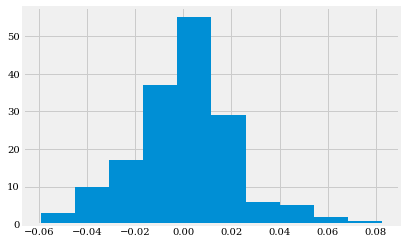

In [86]:
sample_relatively['AFLT'].hist()

In [ ]:
sns.boxplot()

In [79]:
# Удалим пропуски
df_fin1 =sample_relatively[sample_relatively.notna().any(axis=1)].copy()
df_fin1

,AFLT,SNGS
1,-0.004216,0.031972
2,0.063502,0.049970
3,-0.033267,-0.023415
4,0.013235,-0.007797
5,0.015965,0.005894
...,...,...
161,-0.003851,0.031722
162,0.006186,0.019766
163,0.024590,-0.015219
164,-0.057500,-0.015892


In [72]:
len(df_fin1)

165

### Тест Стьюдента о равенстве средних значений

In [84]:
def t_tests(data1, data2):
    df = pd.DataFrame({'Mean Group 1' : [data1.mean()],
                      'Mean Group 2' : [data2.mean()],
                      't-value' : [stats.ttest_ind(data1, data2)[0]],
                       'p-value': [stats.ttest_ind(data1, data2)[1]],
                      'Valid group1' : [len(data1)],
                      'Valid group2' : [len(data2)],
                        'Std group1' : [data1.std()],
                        'Std group2' :  [data2.std()]})
    return df

In [85]:
t_tests(df_fin1[df_task2.loc[0][0]], df_fin1[df_task2.loc[0][1]])

,Mean Group 1,Mean Group 2,t-value,p-value,Valid group1,Valid group2,Std group1,Std group2
0,0.000773,0.00227,-0.587889,0.557011,165,165,0.021967,0.024246


### Вывод

Поскольку  уровень значимости   , то различие средних доход-ностей для двух выборок не значимо. Таким образом, нулевая гипотеза о ра-венстве средних значений доходностей принимается. 

In [112]:
df_fin1

,AFLT,SNGS
1,-0.004216,0.031972
2,0.063502,0.049970
3,-0.033267,-0.023415
4,0.013235,-0.007797
5,0.015965,0.005894
...,...,...
161,-0.003851,0.031722
162,0.006186,0.019766
163,0.024590,-0.015219
164,-0.057500,-0.015892


### Диагарамма размаха уровня 0.9

Text(0.5, 1.0, 'Диаграмма размаха уровня 95%')

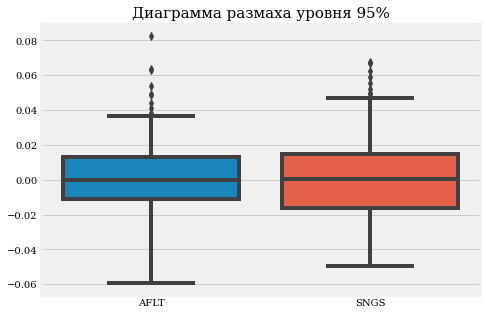

In [125]:
# Построим график боксплот признаков
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
sns.boxplot(data = df_fin1, whis=[0, 95])
ax.set_title('Диаграмма размаха уровня 95%', size=15)

## Хи квадрат

In [103]:
import numpy as np
cut_bins = [-0.03, -0.02, -0.01, 0,  0.02, 0.03, 0.05, 0.06, 0.1]
# Создаем переменную для AFLT
df_aflft = pd.DataFrame(df_fin1[df_task2.loc[0][0]])
df_aflft['bins1'] = pd.cut(df_aflft['AFLT'], bins = cut_bins)
aflft = df_aflft.groupby('bins1', as_index=False).agg('count')
aflft['group'] = np.arange(1,9)
aflft

,bins1,AFLT,group
0,"(-0.03, -0.02]",12,1
1,"(-0.02, -0.01]",22,2
2,"(-0.01, 0.0]",36,3
3,"(0.0, 0.02]",54,4
4,"(0.02, 0.03]",15,5
5,"(0.03, 0.05]",9,6
6,"(0.05, 0.06]",1,7
7,"(0.06, 0.1]",3,8


In [102]:
# Создаем переменную для AFLT
cut_bins = [-0.03, -0.02, -0.01, 0,  0.02, 0.03, 0.05, 0.06, 0.1]
df_SNGS = pd.DataFrame(df_fin1[df_task2.loc[0][1]])
df_SNGS['bins2'] = pd.cut(df_SNGS['SNGS'], bins=cut_bins)
SNGS = df_SNGS.groupby('bins2', as_index=False).agg('count')
SNGS['group'] = np.arange(1,9)
SNGS

,bins2,SNGS,group
0,"(-0.03, -0.02]",21,1
1,"(-0.02, -0.01]",21,2
2,"(-0.01, 0.0]",29,3
3,"(0.0, 0.02]",51,4
4,"(0.02, 0.03]",10,5
5,"(0.03, 0.05]",15,6
6,"(0.05, 0.06]",3,7
7,"(0.06, 0.1]",4,8


In [105]:
df_chi = SNGS[['group', 'SNGS']].merge(aflft[['group', 'AFLT']], how='left', on='group')
df_chi

,group,SNGS,AFLT
0,1,21,12
1,2,21,22
2,3,29,36
3,4,51,54
4,5,10,15
5,6,15,9
6,7,3,1
7,8,4,3


In [106]:
chi2_stat = stats.chi2_contingency(df_chi[['SNGS', 'AFLT']])
print(f'Статистика Chi-square = {chi2_stat[0]}')
print(f'p_value = {chi2_stat[1]}')

Статистика Chi-square = 6.947443740648707
p_value = 0.4343724677473162


Наблюдаемый уровень значимости   говорит о статистически не значимом различии выборочных распределений. Таким образом, нулевая гипотеза «Распределения доходностей акций  не различаются» принимается.

In [108]:
pvalue_ks = stats.ks_2samp(df_fin1['SNGS'], df_fin1['AFLT'])[1]

In [109]:
pvalue_ks

0.4208664797964598

In [128]:
def kolmogorov_tests(data1, data2):
    df = pd.DataFrame({'Mean Group 1' : [data1.mean()],
                      'Mean Group 2' : [data2.mean()],
                       'p-value': [stats.ks_2samp(data1, data2)[1]],
                      'Valid group1' : [len(data1)],
                      'Valid group2' : [len(data2)],
                        'Std group1' : [data1.std()],
                        'Std group2' :  [data2.std()]})
    return df

In [130]:
kolmogorov_tests(df_fin1['SNGS'], df_fin1['AFLT'])

,Mean Group 1,Mean Group 2,p-value,Valid group1,Valid group2,Std group1,Std group2
0,0.00227,0.000773,0.420866,165,165,0.024246,0.021967


### Вывод

Наблюдаемый уровень значимости   говорит о статистически не значимом различии выборочных распределений. Таким образом, нулевая гипотеза «Распределения доходностей акций  не различаются» принимается.